In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import time





# import seaborn as sbn
# import timeit



from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import KFold


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Dataset

Iman Sharafaldin, Arash Habibi Lashkari, and Ali A. Ghorbani, “Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization”, 4th International Conference on Information Systems Security and Privacy (ICISSP), Portugal, January 2018I

# First dataset representation

In [202]:
path="datasets/dataframe_benign_portscan.csv"
df = pd.read_csv(path)
df.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,1,113.152941,64.975610,158.045455,1328,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,1,113.152941,64.975610,158.045455,1328,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,1,0.000000,0.000000,0.000000,32,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,1,112.795181,66.536585,157.952381,1328,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,2,0.000000,0.000000,0.000000,32,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,22,244,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,8196.721311,244.00000,0.000000,244,244,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,32,32,4098.360656,4098.360656,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,1,0.000000,0.000000,0.000000,32,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,22,1307239,41,40,2728,6634,456,0,66.536585,110.129945,976,0,165.850000,325.142379,7161.659039,61.962656,16340.48750,107311.878700,956263,0,1307239,32680.975,159066.9939,997887,1,350863,8996.487179,20369.77643,87521,1,0,1328,1296,31.363813,30.598842,0,976,114.170732,243.964772,59518.81000,0,0,0,1,0,0,0,0,115.580247,66.536585,165.850000,1328,41,2728,40,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,60058,82,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,36585.365850,41.00000,11.313709,49,33,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,32,64,12195.121950,24390.243900,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,2,0.000000,0.000000,0.000000,32,1,0,2,0,243,290,0,32,0.0

# Dataset characteristics

In [203]:
df.columns = [col.lstrip() for col in df.columns] # delete a space before name of the columns
df.columns # prints all the columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count'

## Number of rows and columns

In [204]:
df.shape

(286096, 69)

## Descriptive statistics

In [205]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,286096.000000,286096.000000,286096.000000,2.860960e+05,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,286096.000000,286096.000000,286096.000000,286096.000000,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05,2.860960e+05
mean,8015.814957,5.386306e+06,3.476305,3.523953,233.703330,2.710754e+03,81.132277,10.360362,24.164366,24.622107,185.887101,27.510668,76.568685,55.814592,1.117593e+06,6.236320e+04,3.440116e+05,6.698980e+05,1.823650e+06,1.153528e+04,5.262043e+06,7.801051e+05,5.093240e+05,1.775746e+06,4.489433e+05,4.974906e+06,7.982842e+05,3.967066e+05,1.571719e+06,5.060200e+05,0.020968,91.943879,87.239150,4.146297e+04,2.113554e+04,10.135947,207.042874,47.919902,61.832647,3.561838e+04,0.008088,0.020968,0.000073,0.661110,0.123445,0.044719,0.000073,0.850617,55.221141,24.164366,76.568685,91.943879,3.476305,233.703330,3.523953,2.710754e+03,11150.420831,1146.227102,1.730720,29.080511,3.413634e+04,2.297963e+04,7.795819e+04,2.174195e+04,1.605051e+06,6.128327e+04,1.649324e+06,1.538278e+06
std,15346.254906,2.193700e+07,19.527596,28.307086,1866.714695,5.101078e+04,327.968919,24.252211,78.429008,117.290777,586.063169,54.237347,204.267870,196.760988,2.568310e+07,1.921187e+05,2.126341e+06,3.832840e+06,9.039912e+06,3.802998e+05,2.181016e+07,5.983210e+06,2.577312e+06,9.025005e+06,5.780141e+06,2.126673e+07,6.246715e+06,2.373165e+06,8.718060e+06,6.046578e+06,0.143279,503.881172,698.686067,1.602280e+05,6.249840e+04,18.778166,636.985751,122.100317,178.312136,1.632023e+05,0.089570,0.143279,0.008567,0.473333,0.328947,0.206687,0.008567,0.450324,129.866212,78.429008,204.267870,503.881172,19.527596,1866.714695,28.307086,5.101078e+04,14275.057102,6627.821754,14.906899,8.013593,4.662323e+05,2.624737e+05,7.347312e+05,4.225875e+05,8.687769e+06,1.217802e+06,8.888287e+06,8.566916e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.930000e+08,-2.000000e+06,-1.300000e+01,0.000000e+00,-1.300000e+01,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,

## Display general information about the data frame

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286096 entries, 0 to 286095
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             286096 non-null  int64  
 1   Flow Duration                286096 non-null  int64  
 2   Total Fwd Packets            286096 non-null  int64  
 3   Total Backward Packets       286096 non-null  int64  
 4   Total Length of Fwd Packets  286096 non-null  int64  
 5   Total Length of Bwd Packets  286096 non-null  int64  
 6   Fwd Packet Length Max        286096 non-null  int64  
 7   Fwd Packet Length Min        286096 non-null  int64  
 8   Fwd Packet Length Mean       286096 non-null  float64
 9   Fwd Packet Length Std        286096 non-null  float64
 10  Bwd Packet Length Max        286096 non-null  int64  
 11  Bwd Packet Length Min        286096 non-null  int64  
 12  Bwd Packet Length Mean       286096 non-null  float64
 13 

# Data preprossesing

## Stosunek BENIGN do PortScan

In [207]:
df.value_counts("Label")

Label
PortScan    158804
BENIGN      127292
Name: count, dtype: int64

Sprawdzenie istnienia pustych pól

In [208]:
df.isnull().sum()
#df= df.dropna()
#df1 = df.drop_duplicates()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Fl

Zamiana wartości kolumny Label

PortScan -> 1
BENIGN -> 0

In [209]:
df['Label'] = np.where(df['Label']=='PortScan', 1, 0)

df.value_counts("Label")

Label
1    158804
0    127292
Name: count, dtype: int64

In [210]:
columns_with_all_zeros = df.eq(0).all()

# Wyświetl kolumny, które składają się z samych zer
print(columns_with_all_zeros[columns_with_all_zeros])

# Wyświetl nazwy kolumn, które składają się z samych zer
print(columns_with_all_zeros[columns_with_all_zeros].index)

Series([], dtype: bool)
Index([], dtype='object')


# Odfiltrowanie kolumn

Korelacja prosta

In [211]:
# import pandas as pd

# # Załóżmy, że masz DataFrame o nazwie 'df'
# # Jeśli dane są w innym formacie, dostosuj ten fragment kodu
# # df = pd.read_csv("twoj_plik.csv")

# # Usuń kolumny, które nie są numeryczne (jeśli istnieją)
# numerical_columns = df.columns
# df_numeric = df[numerical_columns]

# # Iteruj przez każdą kolumnę i oblicz korelację z kolumną 'Label'
# correlations = {}
# for column in df_numeric.columns:
#     correlation = df[column].corr(df['Label'])
#     correlations[column] = correlation

# # Wyświetl korelacje dla każdej kolumny
# for column, correlation in correlations.items():
#     print(f"Korelacja dla {column}: {correlation}")


# Usuń kolumny, które nie są numeryczne (jeśli istnieją)
numerical_columns = df.columns
df_numeric = df[numerical_columns]
n=0
# Iteruj przez każdą kolumnę i oblicz korelację z kolumną 'Label'
correlations = {}
for column in df_numeric.columns:
    correlation = df[column].corr(df['Label'])
    correlations[column] = correlation

# Wyświetl korelacje tylko dla kolumn z wartością bezwzględną większą niż 0.2
for column, correlation in correlations.items():
    if abs(correlation) > 0.2:
        n+=1
        print(column)
print(n)

Flow Duration
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow IAT Max
Fwd IAT Total
Fwd IAT Std
Fwd IAT Max
Bwd IAT Total
Min Packet Length
Max Packet Length
Packet Length Mean
Packet Length Std
Packet Length Variance
PSH Flag Count
ACK Flag Count
URG Flag Count
Down/Up Ratio
Average Packet Size
Avg Fwd Segment Size
Avg Bwd Segment Size
Init_Win_bytes_forward
min_seg_size_forward
Label
29


Korelacja z macierzą

In [212]:
plt.figure(figsize=(68,68))
cor = df.corr()

# sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
# plt.show()

<Figure size 6800x6800 with 0 Axes>

In [213]:
# absolute value of the correlation
cor_target = abs(cor["Label"])

# highly correlated features
relevant_features = cor_target[cor_target>0.2]

# getting the names of the features
names = list(relevant_features.keys())

# dataframe with only highly correlated features
df_filtered = df[names]
print(len(df_filtered.columns))


29


In [214]:
# plt.figure(figsize=(30,30))
# cor = df_filtered.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
# plt.show()

# Podzial na treningowy i testowy zbiór

In [215]:
# Drop the 'Label' column, axis=1 indicates that we are dropping a column, not a row
X = df_filtered.drop(['Label'], axis=1)
y = df_filtered['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape: ", len(X_train))
print("y_train shape: ", len(X_test))

# Number of records in each class
# 1 - PortScan, 0 - Benign
print(y_train.value_counts())
print(y_test.value_counts())


X_train shape:  200267
y_train shape:  85829
Label
1    111189
0     89078
Name: count, dtype: int64
Label
1    47615
0    38214
Name: count, dtype: int64


In [216]:
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

print(y_resampled.value_counts())

Label
0    89078
1    89078
Name: count, dtype: int64


LogisticRegression

In [217]:
results = []

# Function for training and evaluating models
def train_and_evaluate(model, X_train, y_train, X_test, y_test):

    start_time = time.time() # Start time

    # Train the model
    model.fit(X_train, y_train)

    end_time = time.time()  # Finish time
    training_time = end_time - start_time  # Count training time

    # Predict on test data
    y_pred = model.predict(X_test)

# Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

# Save results to the results list
    results.append({
        "Model": model.__class__.__name__,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Confusion Matrix": conf_matrix,
        "Training-Time": training_time
    })

# List of models for training
models = [
    GaussianNB(),
    LogisticRegression(max_iter=1000, solver='liblinear'),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

# Apply the function to each model
for model in models:
    train_and_evaluate(model, X_resampled, y_resampled, X_test, y_test)

                    Model  Accuracy  Precision    Recall  F1-Score  \
0              GaussianNB  0.659159   0.783500  0.659159  0.594624   
1      LogisticRegression  0.914085   0.924743  0.914085  0.912659   
2  RandomForestClassifier  0.999895   0.999895  0.999895  0.999895   

                Confusion Matrix  Training-Time  
0  [[9075, 29139], [115, 47500]]       0.061916  
1  [[30965, 7249], [125, 47490]]       0.871549  
2       [[38213, 1], [8, 47607]]       6.680732  


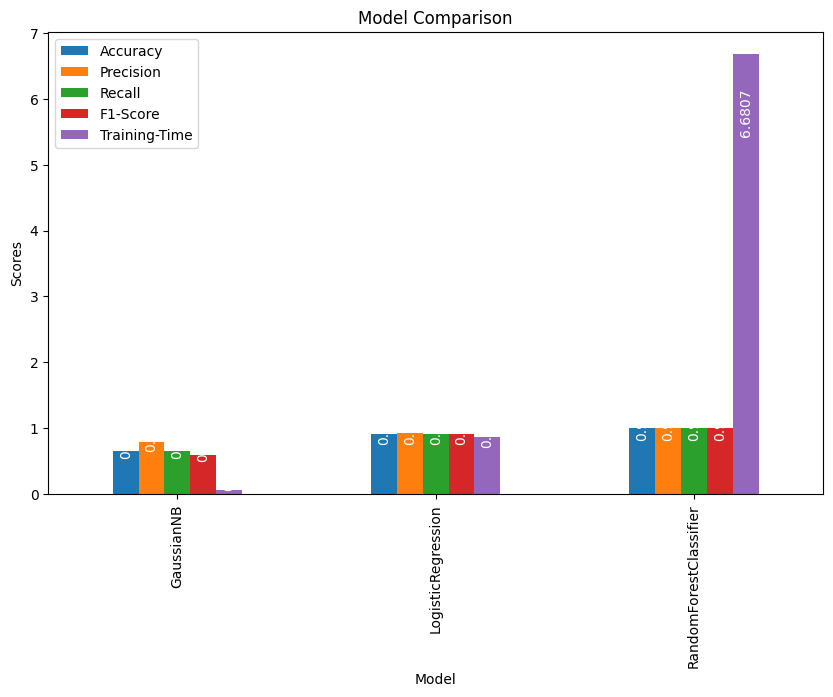

In [218]:
df_results = pd.DataFrame(results)

print(df_results)

ax = df_results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training-Time'], kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Scores')

# Добавление вертикальных значений внутри столбцов
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}", (p.get_x() + p.get_width() / 2., p.get_height()/1.23), ha='center', va='bottom', color='white', rotation=90)

plt.show()


GaussianNB model

In [219]:
gaus_model = GaussianNB()
gaus_model.fit(X_resampled, y_resampled)

y_pred = gaus_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность:", accuracy)
print("Отчет по классификации:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Точность: 0.659159491547146
Отчет по классификации:
               precision    recall  f1-score   support

           0       0.99      0.24      0.38     38214
           1       0.62      1.00      0.76     47615

    accuracy                           0.66     85829
   macro avg       0.80      0.62      0.57     85829
weighted avg       0.78      0.66      0.59     85829

[[ 9075 29139]
 [  115 47500]]


Random Forest

In [220]:
random_model = LogisticRegression(max_iter=1000, solver='liblinear')
random_model.fit(X_resampled, y_resampled)

y_pred = random_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9140849829311771
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.81      0.89     38214
           1       0.87      1.00      0.93     47615

    accuracy                           0.91     85829
   macro avg       0.93      0.90      0.91     85829
weighted avg       0.92      0.91      0.91     85829

[[30965  7249]
 [  125 47490]]
